# Neural Network

We chose the neural network regression for the prediction of the demand of bikesharing rental hourly. For that Keras as well as Tensorflow will be used and should be installed. Here we use the same procedure as in the workshop 9 *neural networks for regression in keras*.

In [16]:
# import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# supress versioning warnings of keras
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# import keras libraries

#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Data preparation

In [17]:
# Load data

df_bike_trips = pd.read_parquet("../../data/bike_trips_hourly_FINAL.parquet")
df_bike_trips.head(2)

,starting_trips,Most_Occuring_Starting_Neighborhood,min_temp,precip,hour,month,is_weekday,season,is_holiday
index,,,,,,,,,
2016-01-01 00:00:00,26.0,109,6.7,0.0,0,1,1,4,1
2016-01-01 01:00:00,39.0,112,7.2,0.0,1,1,1,4,1


#### Define X and Y

In [18]:
# Defining inputs and output

y = df_bike_trips["starting_trips"]
X = df_bike_trips.drop("starting_trips", axis=1)

#### Train the model on the training set

In [19]:
# Adjusted test_size to 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Normalizing training data

st_scaler = StandardScaler()
st_scaler.fit(X_train)
X_train_scaled = st_scaler.transform(X_train)

### Initializing the ANN

In [21]:
# Defining the NN model
# Dense matches the number of features -> adjusted dense 

model = Sequential(
    [Dense(8, activation="relu", input_shape=[X_train.shape[1]]),
    Dense(8, activation="relu"),
     Dense(1)])


# To-Do: Look at possible rebuild of TensorFlow

In [22]:
# Compiling the ANN

model.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [24]:
epochs = 100

history = model.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

Epoch 1/100
163/163 [==============================] - 0s 1ms/step - loss: 11413.5396 - mae: 76.0435 - mse: 11413.5396 - val_loss: 11188.4453 - val_mae: 75.8060 - val_mse: 11188.4453
Epoch 2/100
163/163 [==============================] - 0s 1ms/step - loss: 10501.9193 - mae: 71.5167 - mse: 10501.9193 - val_loss: 9494.9150 - val_mae: 67.0786 - val_mse: 9494.9150
Epoch 3/100
163/163 [==============================] - 0s 728us/step - loss: 8348.1890 - mae: 60.4019 - mse: 8348.1890 - val_loss: 6240.1533 - val_mae: 52.4383 - val_mse: 6240.1533
Epoch 4/100
163/163 [==============================] - 0s 667us/step - loss: 5146.0898 - mae: 47.8161 - mse: 5146.0898 - val_loss: 4379.5474 - val_mae: 45.4806 - val_mse: 4379.5474
Epoch 5/100
163/163 [==============================] - 0s 703us/step - loss: 4231.5785 - mae: 44.8282 - mse: 4231.5785 - val_loss: 4043.3267 - val_mae: 44.9485 - val_mse: 4043.3267
Epoch 6/100
163/163 [==============================] - 0s 668us/step - loss: 4085.0249 - mae:

In [25]:
model.predict(X_train_scaled[:10])

array([[  1.8472533],
       [ 10.912302 ],
       [190.50252  ],
       [ 94.13487  ],
       [ 59.391968 ],
       [175.13695  ],
       [  4.176828 ],
       [117.89322  ],
       [117.61105  ],
       [129.37517  ]], dtype=float32)

In [26]:
df_history = pd.DataFrame(history.history)
df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,11058.590820,74.298889,11058.590820,11188.445312,75.806007,11188.445312
1,10215.997070,69.602036,10215.997070,9494.915039,67.078636,9494.915039
2,7706.135742,57.388092,7706.135742,6240.153320,52.438286,6240.153320
3,5045.380859,47.006565,5045.380859,4379.547363,45.480614,4379.547363
4,4186.454102,44.894672,4186.454102,4043.326660,44.948505,4043.326660
...,...,...,...,...,...,...
95,2036.665894,28.751860,2036.665894,1974.820190,28.666220,1974.820190
96,2030.463745,28.684946,2030.463745,1969.098877,28.805162,1969.098877
97,2026.344849,28.652288,2026.344849,1963.130615,28.646580,1963.130615
98,2021.076904,28.593052,2021.076904,1959.096924,28.504730,1959.096924


In [27]:
df_root_metrics = df_history[["mse", "val_mse"]].apply(np.sqrt)
df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
df_root_metrics

,rmse,val_rmse
0,105.159835,105.775448
1,101.074216,97.441855
2,87.784599,78.994641
3,71.030844,66.178149
4,64.702814,63.587158
...,...,...
95,45.129435,44.438949
96,45.060667,44.374530
97,45.014940,44.307230
98,44.956389,44.261687


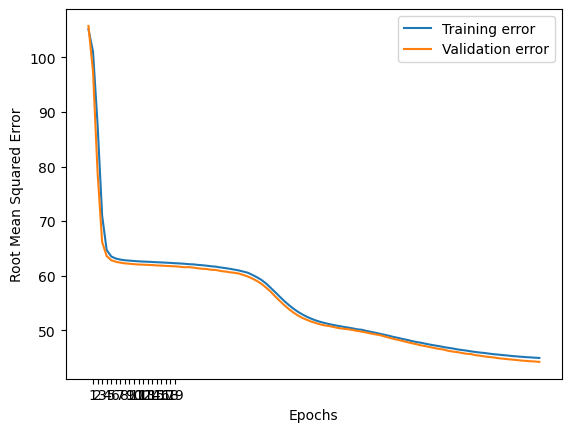

In [28]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(df_root_metrics["rmse"], label = 'Training error')
plt.plot(df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

# plt.xlim([0, epochs])
plt.xticks(range(1,20))
plt.legend()

plt.show()

In [29]:
# Prediction on test set

X_test_scaled = st_scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [30]:
# Report regression performance on test set
# To-Do: look at metrics again

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
# print(f"R^2: { r2_score(y_test, y_pred):.2f}")

#There are many metrics that can be used to evaluate the performance of a neural network regression model. Some common metrics include:

#Mean absolute error (MAE) - This measures the average distance between the predicted values and the true values.
#Mean squared error (MSE) - This measures the average squared difference between the predicted values and the true values.
#Root mean squared error (RMSE) - This is the square root of the MSE, and it is often used because it is in the same units as the original data.
#R-squared - This is a measure of the degree to which the model's predictions explain the variance in the target variable. It ranges from 0 to 1, with higher values indicating better fit.
#Other metrics that may be used to evaluate the performance of a neural network regression model include mean absolute percentage error (MAPE), mean squared logarithmic error (MSLE), and relative absolute error (RAE). Which metric is most appropriate to use depends on the specific requirements of the application and the goals of the model.

MAE: 29.37
MSE: 1959.63
MAPE: 38.60%
RMSE: 44.27


### To DO: Tuning neural network topology : https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/